This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

from Functions_ImportData import import_filtered_NOAA_obs
from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month
from Functions_Indicators import select_station

from Graphs_functions import cdf_plot_category_or_obs
from Graphs_functions import boxplots_
from Graphs_functions import compare_3_lines

# Import data

## Observations data

### Precipitation and temperature NOAA

In [2]:
daily_sum_obs_from_NOAA = import_filtered_NOAA_obs()

In [3]:
daily_sum_obs_from_NOAA

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,...,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,PRCP MISSING,TAVG MISSING,TMAX MISSING,TMIN MISSING
0,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-04-05,2.0,",,S",23.8,"H,,S",...,",D,S",20.0,",,S",1974,Apr,Dry,0,0,0,0
1,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-06-17,0.0,",,S",18.2,"H,,S",...,",,S",11.0,",,S",1974,Jun,Dry,0,0,0,0
2,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-06-23,NaN,NaN,21.0,"H,,S",...,NaN,NaN,NaN,1974,Jun,Dry,1,0,1,1
3,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-07-02,0.0,",,S",21.5,"H,,S",...,NaN,16.0,",,S",1974,Jul,Dry,0,0,1,0
4,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-07-03,0.0,",,S",20.5,"H,,S",...,NaN,16.0,",,S",1974,Jul,Dry,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137721,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-12-27,NaN,NaN,30.8,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1
137722,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-12-28,NaN,NaN,30.0,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1
137723,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-12-29,NaN,NaN,28.0,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1
137724,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-12-30,NaN,NaN,25.6,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1


In [4]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'NAME','BEIRA, MZ')

In [5]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'NAME','PEMBA, MZ')

In [6]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'NAME','CHIMOIO, MZ')

In [7]:
daily_sum_obs_from_NOAA_CHIMOIO

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,...,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,PRCP MISSING,TAVG MISSING,TMAX MISSING,TMIN MISSING
2689,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-01,0.4,",,Q",NaN,NaN,...,",,Q",20.7,",,Q",1970,Jan,Humid,0,1,0,0
2690,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-02,0.0,",,Q",NaN,NaN,...,",,Q",21.2,",,Q",1970,Jan,Humid,0,1,0,0
2691,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-03,0.0,",,Q",NaN,NaN,...,",,Q",20.5,",,Q",1970,Jan,Humid,0,1,0,0
2692,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-04,0.0,",,Q",NaN,NaN,...,",,Q",19.2,",,Q",1970,Jan,Humid,0,1,0,0
2693,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,1970-01-05,0.0,",,Q",NaN,NaN,...,",,Q",20.2,",,Q",1970,Jan,Humid,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-27,NaN,NaN,24.9,"H,,S",...,NaN,21.8,",,S",2014,Dec,Humid,1,0,1,0
14160,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-28,NaN,NaN,25.9,"H,,S",...,",,S",20.0,",,S",2014,Dec,Humid,1,0,0,0
14161,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-29,23.1,",,S",24.3,"H,,S",...,",,S",20.9,",,S",2014,Dec,Humid,0,0,0,0
14162,MZ000067295,"CHIMOIO, MZ",-19.117,33.467,732.0,2014-12-30,45.0,",,S",22.9,"H,,S",...,",,S",21.0,",,S",2014,Dec,Humid,0,0,0,0


### Precipitation from Gorongosa 

In [8]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\DirecltyfromMoz\Precipitation_Gorongosa_reformat.csv'
pr_obs_gorongosa_from_gorongosa = pd.read_csv(path)
pr_obs_gorongosa_from_gorongosa=add_year_month_season(pr_obs_gorongosa_from_gorongosa,'time')
pr_obs_gorongosa_from_gorongosa['pr'][pr_obs_gorongosa_from_gorongosa['pr']=='s/i'] = pr_obs_gorongosa_from_gorongosa['pr'].iloc[0]
pr_obs_gorongosa_from_gorongosa['pr'] = pr_obs_gorongosa_from_gorongosa['pr'].astype(float)
pr_obs_gorongosa_from_gorongosa

,time,pr,Year,Month,Season
0,1980-01-01,NaN,1980,Jan,Humid
1,1980-01-02,NaN,1980,Jan,Humid
2,1980-01-03,NaN,1980,Jan,Humid
3,1980-01-04,NaN,1980,Jan,Humid
4,1980-01-05,NaN,1980,Jan,Humid
...,...,...,...,...,...
14971,2020-12-27,2.7,2020,Dec,Humid
14972,2020-12-28,0.0,2020,Dec,Humid
14973,2020-12-29,0.0,2020,Dec,Humid
14974,2020-12-30,138.4,2020,Dec,Humid


## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [9]:
# to compare historic modelisation with NOAA observation data
path_model_pr_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_pr_past)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [10]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past

,Name station,Experiment,Model,Latitude,Longitude,Date,Mean of the daily precipitation rate mm/day,Year,Month,Season
493080,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,01-01-1970,15.221261,1970,Jan,Humid
493081,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,02-01-1970,15.258603,1970,Jan,Humid
493082,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,03-01-1970,3.232764,1970,Jan,Humid
493083,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,04-01-1970,0.340715,1970,Jan,Humid
493084,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,05-01-1970,2.544045,1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
739615,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,27-12-2014,3.778890,2014,Dec,Humid
739616,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,28-12-2014,5.969581,2014,Dec,Humid
739617,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,29-12-2014,3.112424,2014,Dec,Humid
739618,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,30-12-2014,0.000000,2014,Dec,Humid


In [11]:
# pas convaincue que le ligne suivante soit tres utile

In [12]:
# to compare projections with NOAA observation data
path_past_proj = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Pemba = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Pemba_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Chimoio = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Chimoio_WTP_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Mutua = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='WTP_Mutua_EIB']

### Temperature NEX-GDDP-CMIP6

In [19]:
# to compare with NOAA observation data
path_model_tas_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1970-2014_projectsMoz.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_tas_past)
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1974,2014)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

### Maximum temperature NEX-GDDP-CMIP6

In [14]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1970-2014_projectsMoz.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [15]:
# to compare projections with NOAA observation data
path_past_proj_tasmax = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1950-2100.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj_tasmax)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_CHIMOIO = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_BEIRA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='BEIRA, MZ']

### Minimum temperature NEX GDDP CMIP6

In [16]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmin\tasmin_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmin_1970-2014_projectsMoz.csv'
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

In [17]:
daily_sum_obs_from_NOAA_BEIRA

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,...,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,PRCP MISSING,TAVG MISSING,TMAX MISSING,TMIN MISSING
123007,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-01,0.0,",,Q",NaN,NaN,...,",,Q",23.8,",,Q",1970,Jan,Humid,0,1,0,0
123008,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-02,0.0,",,Q",NaN,NaN,...,",,Q",25.2,",,Q",1970,Jan,Humid,0,1,0,0
123009,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-03,0.0,",,Q",NaN,NaN,...,",,Q",26.2,",,Q",1970,Jan,Humid,0,1,0,0
123010,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-04,2.5,",,Q",NaN,NaN,...,",,Q",25.0,",,Q",1970,Jan,Humid,0,1,0,0
123011,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,1970-01-05,10.3,",,Q",NaN,NaN,...,",,Q",24.6,",,Q",1970,Jan,Humid,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137721,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-27,NaN,NaN,30.8,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1
137722,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-28,NaN,NaN,30.0,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1
137723,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-29,NaN,NaN,28.0,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1
137724,MZ000067297,"BEIRA, MZ",-19.8,34.9,16.0,2014-12-30,NaN,NaN,25.6,"H,,S",...,NaN,NaN,NaN,2014,Dec,Humid,1,0,1,1


missing data


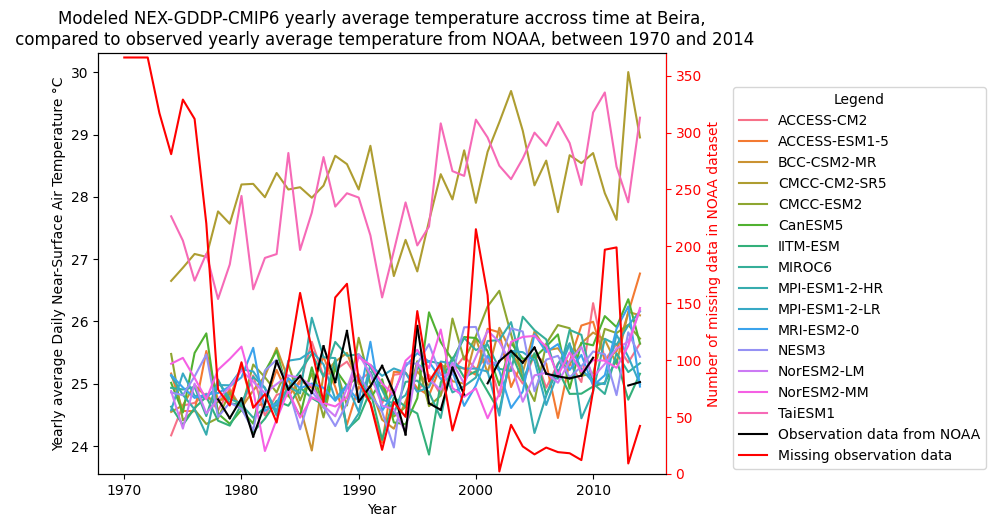

In [20]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','Chimoio')

## Maximum temperature

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean maximum daily temperature °C','PEMBA')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
df = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA[['Experiment','Year','Model','Daily Maximum Near-Surface Air Temperature °C']]#.groupby(['Experiment','Year'])[['Daily Maximum Near-Surface Air Temperature °C']].mean().reset_index()
cdf_plot_category_or_obs('Pemba, MZ',df_initial=df,name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Experiment',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

## Minimum temperature

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('BEIRA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','Beira')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMIN','Pemba')

In [ ]:
# Chimoio

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','NOAA','Annual mean daily minimum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','Chimoio')

## Precipitation

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_PEMBA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','Pemba')

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

# What needs to be changed ?
## Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature and minimum temeprature, 'TAIESM1' and 'CMCC-CM2-SR5' are not following the trend. Take out those 2 models for all climate variable

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for average temperature
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for minimum temperature
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

## Temperature : take out some models

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

## Maximum temperature : take out some models (the ones that were not performing well for average temperature) from modelled data and some extreme values that are not plausible from observation data

In [ ]:
# take out models 
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# chimoio

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean daily maximum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')